In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
%matplotlib inline

In [3]:
advertising = pd.read_csv("tvmarketing.csv")

In [4]:
advertising.head(2)

,TV,Sales
0,230.1,22.1
1,44.5,10.4


In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [10]:
advertising.columns

Index(['TV', 'Sales'], dtype='object')

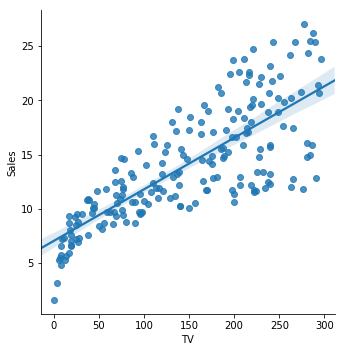

In [18]:
sns.pairplot(advertising,x_vars='TV',y_vars='Sales',height=5,kind='reg')

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X=advertising['TV']
y=advertising['Sales']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

C:\Users\vicky\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [25]:
##General convention in scikit-learn that observations are rows, while features are columns. 

In [26]:
import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
print(lr.intercept_)
print(lr.coef_)


6.989665857411679
[0.04649736]


In [31]:
##𝑦=6.989+0.0464×𝑇𝑉 

In [32]:
y_pred = lr.predict(X_test)

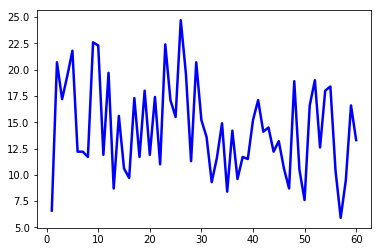

In [37]:
c = range(1,61,1)
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")


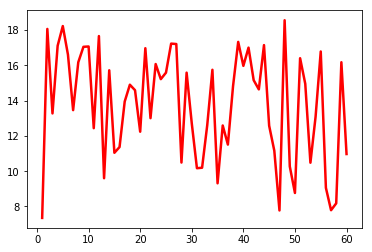

In [38]:
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")


Text(0, 0.5, 'Sales')

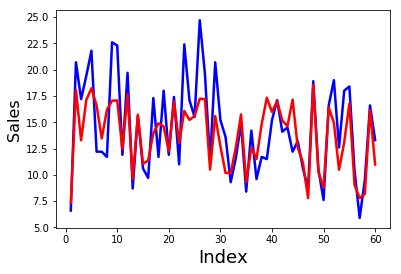

In [39]:
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)   

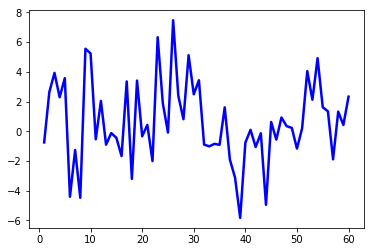

In [41]:
##total error
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [43]:
r_squared = r2_score(y_test, y_pred)

In [44]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.97579853285485
r_square_value : 0.5942987267783302
